In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!pip install xgboost==1.7.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loader

In [ ]:
!gdown --id 1wg5oA66QtwEHqYUHfVzXsY1gtgqs1wJq

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1wg5oA66QtwEHqYUHfVzXsY1gtgqs1wJq
From (redirected): https://drive.google.com/uc?id=1wg5oA66QtwEHqYUHfVzXsY1gtgqs1wJq&confirm=t&uuid=697034ca-8852-4906-a0f8-44f373b48f1e
To: /content/criteo.zip
100% 87.9M/87.9M [00:00<00:00, 103MB/s] 


In [ ]:
!unzip -o "criteo.zip"  -d  "/content"

Archive:  criteo.zip
  inflating: /content/train_1m.txt   


In [ ]:
label='Label'

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:

continue_var = ['I' + str(i) for i in range(1, 14)]
cat_features = ['C' + str(i) for i in range(1,27)]
col_names_train = ['Label'] + continue_var + cat_features
col_names_test = col_names_train[1:]
train = pd.read_csv('train_1m.txt', sep='\t', 
                     names=col_names_train,)


train.head(1)

,Label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16


In [ ]:
fill_mean = lambda x: x.fillna(x.mean())

for col in continue_var:
    train[col] = train[col].fillna(train[col].mean())
    train[col] = train[col].astype('float64')
train = train.fillna('unknown')


In [ ]:
data=train

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for c in cat_features:
    le = LabelEncoder()
    le.fit(data[c])
    data[c] = le.transform(data[c])
  
# for i in cat_features:
#   data = pd.get_dummies(data, prefix=[i], columns = [i])

## EDA

classes=list(data[label].unique())
classes

classes = pd.value_counts(data[label], sort = True)


In [ ]:

features=list(train.columns)
features.remove(label)

## Train Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
train, valid = train_test_split(train ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

## Model Evaluation Metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#gives model report in dataframe
def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #predict_probab  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       'roc_auc_score':[roc_auc],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

# Handle Data Imbalance 

In [ ]:
data_with_0=data[data[label]==0]
data_with_1=data[data[label]==1]

In [ ]:
data_with_1.shape

(254949, 40)

In [ ]:
data_with_0.shape

(745051, 40)

In [ ]:
all_data=data
data= data.sample(frac = 0.05,random_state=1)
data.shape

(50000, 40)

In [ ]:
data_test= pd.concat([data_with_0.sample(frac = 0.05,random_state=1),data_with_1.sample(frac = 0.05,random_state=1)])
data_test.shape

(50000, 40)

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()

# Define a random state 
state = np.random.RandomState(42)
X = data[features]
Y = data[label]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(50000, 39)
(50000,)


In [ ]:
from sklearn.model_selection import train_test_split
X, X_Test, Y,Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

## Without handling data Imbalance

In [ ]:
Y.value_counts()

0    29626
1    10374
Name: Label, dtype: int64

In [ ]:
Y_Test.value_counts()

0    7406
1    2594
Name: Label, dtype: int64

###  Logistic regression before oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)
#outputs for every model
model1 = model_report(logistic_model,X,Y,X_Test,Y_Test, "Logistic Regression")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model1

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.5,0.7406,0.0,0.0,0.0,0.5,0.0


In [ ]:
# logistic_model.fit(x_train,y_train)
# pred_cv_logistic=logistic_model.predict(x_cv)
# score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
# score_logistic

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
#outputs for every model
model2 = model_report(tree_model,X,Y,X_Test,Y_Test, " Decision Tree")
model2

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.571838,0.7383,0.225906,0.490377,0.309316,0.571838,0.174196


In [ ]:
# pred_cv_tree=tree_model.predict(x_cv)
# tree_model.fit(x_train,y_train)
# score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
# score_tree

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")
#forest_model.fit(x_train,y_train)
#outputs for every model
model3 = model_report(forest_model,X,Y,X_Test,Y_Test, "Random Forest")
model3

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.567729,0.758,0.172321,0.620833,0.269765,0.567729,0.177001


In [ ]:
# pred_cv_forest=forest_model.predict(x_cv)
# score_forest = accuracy_score(pred_cv_forest,y_cv)*100
# score_forest

In [ ]:
# importances = pd.Series(forest_model.feature_importances_,index=X.columns)
# importances.plot(kind='barh', figsize=(12,8))

### XGBOOST

In [ ]:
scale_pos_weight=1
y1=Y[Y==1].count()
y0=Y[Y==0].count()
if(y1>y0):
  scale_pos_weight=(y1/y0)
else:
  scale_pos_weight=(y0/y1)
  

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier( booster='gbtree',
                 gamma=0, learning_rate=0.1,
                    max_depth = 7, min_child_weight=1,  
                    n_jobs=1,  objective='binary:logistic',
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=scale_pos_weight,n_estimators=500)


# xgb_model.fit(x_train,y_train)
#outputs for every model
model5 = model_report(xgb_model,X,Y,X_Test,Y_Test, "XGBOOST")
model5

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,XGBOOST,0.657398,0.7285,0.509638,0.478119,0.493376,0.657398,0.308195


In [ ]:
# pred_xgb=xgb_model.predict(x_cv)
# score_xgb = accuracy_score(pred_xgb,y_cv)*100
# score_xgb

In [ ]:
# param_test = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6],
#  'n_estimators':[100,150]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, 
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch2.fit(x_train,y_train)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model6= model_report(knn,X,Y,X_Test,Y_Test,
                      "KNN Classifier")
model6

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,KNN Classifier,0.545637,0.7045,0.215497,0.377958,0.274491,0.545637,0.106088


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)
model7 = model_report(gnb,X,Y,X_Test,Y_Test,
                      "Naive Bayes")
model7

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Naive Bayes,0.561038,0.4216,0.85081,0.290242,0.43283,0.561038,0.075011


### SVC

In [ ]:
# from sklearn.svm import SVC
# svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#                decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
#                max_iter=-1, probability=True, random_state=None, shrinking=True,
#                tol=0.001, verbose=False)
# svc_rbf  = SVC(C=1.0, kernel='rbf', 
#                degree= 3, gamma=1.0, 
#                coef0=0.0, shrinking=True,
#                probability=True,tol=0.001,
#                cache_size=200, class_weight=None,
#                verbose=False,max_iter= -1,
#                random_state=None)
# model8 = model_report(svc_lin,X_OV,Y_OV,X_Test,Y_Test,
#                       "SVM Classifier Linear")
# model9 = model_report(svc_rbf,X_OV,Y_OV,X_Test,Y_Test,
#                       "SVM Classifier RBF")

In [ ]:
# model8

In [ ]:
#model9

### LightGBM

In [ ]:
learning_rate = 0.1
num_leaves = 20
min_data_in_leaf = 100
feature_fraction = 1
num_boost_round = 500
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": True,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "n_estimators":1000
          }

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(**params,force_row_wise=True)
model10 = model_report(lgbm_c,X,Y,X_Test,Y_Test,
                      "LGBM Classifier")
model10

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1


,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,LGBM Classifier,0.674845,0.7165,0.588281,0.463407,0.51843,0.674845,0.321542


## Summary withouthandling Imbalance

In [ ]:
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model5,model6,
                                model7,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [ ]:
model_performances

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.500000,0.7406,0.000000,0.000000,0.000000,0.500000,0.000000
1,Decision Tree,0.571838,0.7383,0.225906,0.490377,0.309316,0.571838,0.174196
2,Random Forest,0.567729,0.7580,0.172321,0.620833,0.269765,0.567729,0.177001
3,XGBOOST,0.657398,0.7285,0.509638,0.478119,0.493376,0.657398,0.308195
4,KNN Classifier,0.545637,0.7045,0.215497,0.377958,0.274491,0.545637,0.106088
5,Naive Bayes,0.561038,0.4216,0.850810,0.290242,0.432830,0.561038,0.075011
6,LGBM Classifier,0.674845,0.7165,0.588281,0.463407,0.518430,0.674845,0.321542


## Random oversampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OV, Y_OV = oversample.fit_resample(X, Y)

In [ ]:
Y.value_counts()

0    29626
1    10374
Name: Label, dtype: int64

In [ ]:
Y_OV.value_counts()

0    29626
1    29626
Name: Label, dtype: int64

###  Logistic regression after oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)
#outputs for every model
model1 = model_report(logistic_model,X_OV,Y_OV,X_Test,Y_Test, "Logistic Regression")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model1

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.566697,0.5411,0.619892,0.308578,0.412044,0.566697,0.100467


In [ ]:
# logistic_model.fit(x_train,y_train)
# pred_cv_logistic=logistic_model.predict(x_cv)
# score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
# score_logistic

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
#outputs for every model
model2 = model_report(tree_model,X_OV,Y_OV,X_Test,Y_Test, " Decision Tree")
model2

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.638004,0.6393,0.635312,0.382455,0.477474,0.638004,0.227208


In [ ]:
# pred_cv_tree=tree_model.predict(x_cv)
# tree_model.fit(x_train,y_train)
# score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
# score_tree

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")
#forest_model.fit(x_train,y_train)
#outputs for every model
model3 = model_report(forest_model,X_OV,Y_OV,X_Test,Y_Test, "Random Forest")
model3

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.662113,0.6828,0.619121,0.423747,0.503133,0.662113,0.281987


In [ ]:
# pred_cv_forest=forest_model.predict(x_cv)
# score_forest = accuracy_score(pred_cv_forest,y_cv)*100
# score_forest

In [ ]:
# importances = pd.Series(forest_model.feature_importances_,index=X.columns)
# importances.plot(kind='barh', figsize=(12,8))

### XGBOOST

In [ ]:

from xgboost import XGBClassifier
xgb_model = XGBClassifier( booster='gbtree', 
                 gamma=0, learning_rate=0.1,
                    max_depth = 7, min_child_weight=1,  
                    n_jobs=1,  objective='binary:logistic',
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,n_estimators=500)


# xgb_model.fit(x_train,y_train)
#outputs for every model
model5 = model_report(xgb_model,X_OV,Y_OV,X_Test,Y_Test, "XGBOOST")
model5

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,XGBOOST,0.653433,0.7345,0.484965,0.488165,0.48656,0.653433,0.307521


In [ ]:
# pred_xgb=xgb_model.predict(x_cv)
# score_xgb = accuracy_score(pred_xgb,y_cv)*100
# score_xgb

In [ ]:
# param_test = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6],
#  'n_estimators':[100,150]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, 
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch2.fit(x_train,y_train)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model6= model_report(knn,X_OV,Y_OV,X_Test,Y_Test,
                      "KNN Classifier")
model6

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,KNN Classifier,0.554584,0.5623,0.538551,0.305222,0.389625,0.554584,0.087451


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)
model7 = model_report(gnb,X_OV,Y_OV,X_Test,Y_Test,
                      "Naive Bayes")
model7

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Naive Bayes,0.545717,0.3798,0.890517,0.280749,0.426908,0.545717,0.053609


### SVC

In [ ]:
# from sklearn.svm import SVC
# svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#                decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
#                max_iter=-1, probability=True, random_state=None, shrinking=True,
#                tol=0.001, verbose=False)
# svc_rbf  = SVC(C=1.0, kernel='rbf', 
#                degree= 3, gamma=1.0, 
#                coef0=0.0, shrinking=True,
#                probability=True,tol=0.001,
#                cache_size=200, class_weight=None,
#                verbose=False,max_iter= -1,
#                random_state=None)
# model8 = model_report(svc_lin,X_OV,Y_OV,X_Test,Y_Test,
#                       "SVM Classifier Linear")
# model9 = model_report(svc_rbf,X_OV,Y_OV,X_Test,Y_Test,
#                       "SVM Classifier RBF")

In [ ]:
# model8

In [ ]:
#model9

### LightGBM

In [ ]:
learning_rate = 0.1
num_leaves = 20
min_data_in_leaf = 100
feature_fraction = 1
num_boost_round = 500
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "n_estimators":1000
          }

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(**params)
model10 = model_report(lgbm_c,X_OV,Y_OV,X_Test,Y_Test,
                      "LGBM Classifier")

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044382 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [ ]:
model10

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,LGBM Classifier,0.666127,0.7175,0.559368,0.463134,0.506723,0.666127,0.311244


## Summary After Applying Oversampling

In [ ]:
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model5,model6,
                                model7,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [ ]:
model_performances

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.566697,0.5411,0.619892,0.308578,0.412044,0.566697,0.100467
1,Decision Tree,0.638004,0.6393,0.635312,0.382455,0.477474,0.638004,0.227208
2,Random Forest,0.662113,0.6828,0.619121,0.423747,0.503133,0.662113,0.281987
3,XGBOOST,0.653433,0.7345,0.484965,0.488165,0.486560,0.653433,0.307521
4,KNN Classifier,0.554584,0.5623,0.538551,0.305222,0.389625,0.554584,0.087451
5,Naive Bayes,0.545717,0.3798,0.890517,0.280749,0.426908,0.545717,0.053609
6,LGBM Classifier,0.666127,0.7175,0.559368,0.463134,0.506723,0.666127,0.311244


## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_SM, Y_SM = sm.fit_resample(X, Y)

<Axes: title={'center': 'Count of Target Classes in Dataset Before Sampling'}>

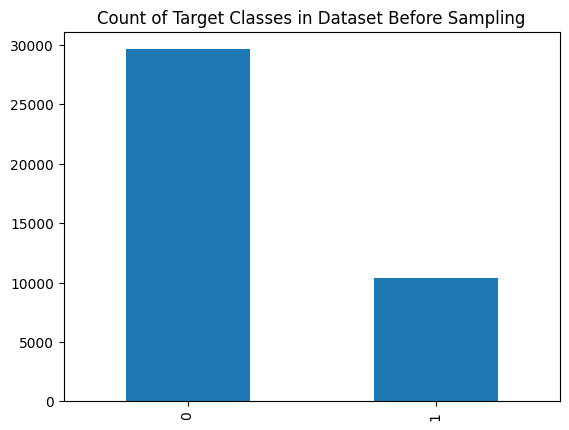

In [ ]:
Y.value_counts().plot(kind='bar', title='Count of Target Classes in Dataset Before Sampling')

<Axes: title={'center': 'Count of Target Classes in Dataset After Sampling'}>

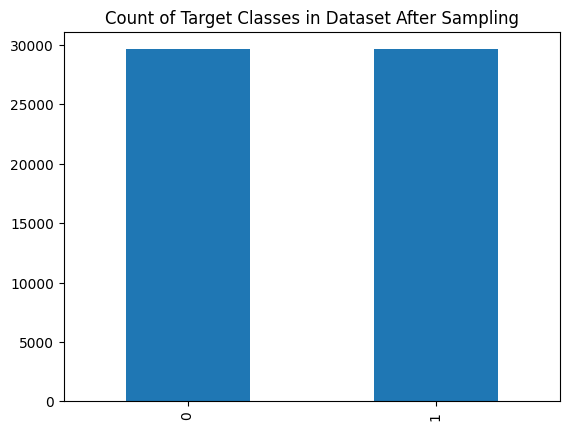

In [ ]:
Y_SM.value_counts().plot(kind='bar', title='Count of Target Classes in Dataset After Sampling')

###  Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)
#outputs for every model
model1 = model_report(logistic_model,X_SM,Y_SM,X_Test,Y_Test, "Logistic Regression")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model1

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.558547,0.5281,0.62182,0.301439,0.406042,0.558547,0.08704


In [ ]:
# logistic_model.fit(x_train,y_train)
# pred_cv_logistic=logistic_model.predict(x_cv)
# score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
# score_logistic

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
#outputs for every model
model2 = model_report(tree_model,X_SM,Y_SM,X_Test,Y_Test, " Decision Tree")
model2

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.605806,0.7248,0.35852,0.460852,0.403296,0.605806,0.228064


In [ ]:
# pred_cv_tree=tree_model.predict(x_cv)
# tree_model.fit(x_train,y_train)
# score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
# score_tree

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")
#forest_model.fit(x_train,y_train)
#outputs for every model
model3 = model_report(forest_model,X_SM,Y_SM,X_Test,Y_Test, "Random Forest")
model3

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.620768,0.726,0.402082,0.467294,0.432242,0.620768,0.253007


In [ ]:
# pred_cv_forest=forest_model.predict(x_cv)
# score_forest = accuracy_score(pred_cv_forest,y_cv)*100
# score_forest

In [ ]:
# importances = pd.Series(forest_model.feature_importances_,index=X.columns)
# importances.plot(kind='barh', figsize=(12,8))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model6= model_report(knn,X_SM,Y_SM,X_Test,Y_Test,
                      "KNN Classifier")
model6

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,KNN Classifier,0.562251,0.5718,0.542406,0.312528,0.396561,0.562251,0.100489


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)
model7 = model_report(gnb,X_SM,Y_SM,X_Test,Y_Test,
                      "Naive Bayes")
model7

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Naive Bayes,0.539242,0.3652,0.900925,0.27729,0.424061,0.539242,0.045349


### LightGBM

In [ ]:
learning_rate = 0.1
num_leaves = 20
min_data_in_leaf = 100
feature_fraction = 1
num_boost_round = 500
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "n_estimators":1000
          }

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(**params)
model10 = model_report(lgbm_c,X_SM,Y_SM,X_Test,Y_Test,
                      "LGBM Classifier")

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
model10

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,LGBM Classifier,0.610663,0.7524,0.316114,0.538765,0.398445,0.610663,0.255649


### XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier( booster='gbtree', 
                 gamma=0, learning_rate=0.1,
                    max_depth = 7, min_child_weight=1,  
                    n_jobs=1,  objective='binary:logistic',
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,n_estimators=500)


# xgb_model.fit(x_train,y_train)
#outputs for every model
model5 = model_report(xgb_model,X_SM,Y_SM,X_Test,Y_Test, "XGBOOST")
model5

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,XGBOOST,0.614175,0.7589,0.313416,0.56341,0.402774,0.614175,0.26681


In [ ]:
# pred_xgb=xgb_model.predict(x_cv)
# score_xgb = accuracy_score(pred_xgb,y_cv)*100
# score_xgb

In [ ]:
# param_test = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6],
#  'n_estimators':[100,150]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, 
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch2.fit(x_train,y_train)


## Summary After Applying SMOTE

In [ ]:
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model5,model6,
                                model7,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [ ]:
model_performances

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.558547,0.5281,0.621820,0.301439,0.406042,0.558547,0.087040
1,Decision Tree,0.605806,0.7248,0.358520,0.460852,0.403296,0.605806,0.228064
2,Random Forest,0.620768,0.7260,0.402082,0.467294,0.432242,0.620768,0.253007
3,XGBOOST,0.614175,0.7589,0.313416,0.563410,0.402774,0.614175,0.266810
4,KNN Classifier,0.562251,0.5718,0.542406,0.312528,0.396561,0.562251,0.100489
5,Naive Bayes,0.539242,0.3652,0.900925,0.277290,0.424061,0.539242,0.045349
6,LGBM Classifier,0.610663,0.7524,0.316114,0.538765,0.398445,0.610663,0.255649


## SMOTE OMEK

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=1)
X_SM, Y_SM = sm.fit_resample(X, Y)

<Axes: title={'center': 'Count of Target Classes in Dataset Before Sampling'}>

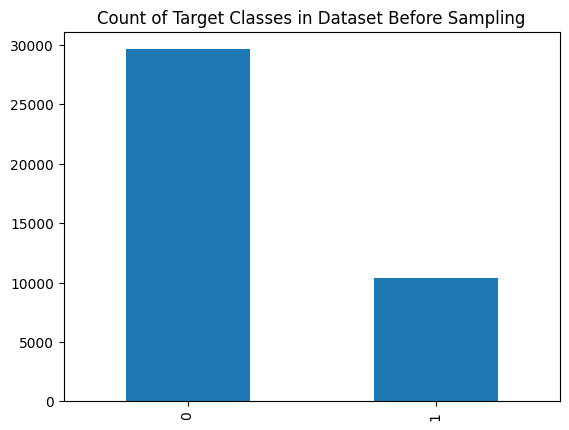

In [ ]:
Y.value_counts().plot(kind='bar', title='Count of Target Classes in Dataset Before Sampling')

<Axes: title={'center': 'Count of Target Classes in Dataset After Sampling'}>

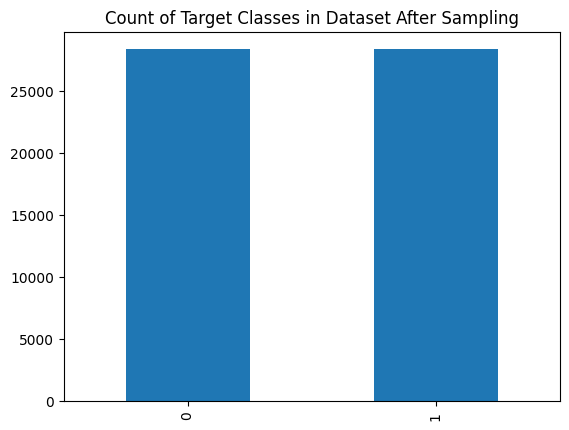

In [ ]:
Y_SM.value_counts().plot(kind='bar', title='Count of Target Classes in Dataset After Sampling')

###  Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)
#outputs for every model
model1 = model_report(logistic_model,X_SM,Y_SM,X_Test,Y_Test, "Logistic Regression")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model1

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.560599,0.5278,0.628759,0.302597,0.408567,0.560599,0.089764


In [ ]:
# logistic_model.fit(x_train,y_train)
# pred_cv_logistic=logistic_model.predict(x_cv)
# score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
# score_logistic

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
#outputs for every model
model2 = model_report(tree_model,X_SM,Y_SM,X_Test,Y_Test, " Decision Tree")
model2

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.603789,0.7207,0.360833,0.451956,0.401286,0.603789,0.222128


In [ ]:
# pred_cv_tree=tree_model.predict(x_cv)
# tree_model.fit(x_train,y_train)
# score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
# score_tree

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")
#forest_model.fit(x_train,y_train)
#outputs for every model
model3 = model_report(forest_model,X_SM,Y_SM,X_Test,Y_Test, "Random Forest")
model3

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.618321,0.7259,0.394757,0.466515,0.427647,0.618321,0.249089


In [ ]:
# pred_cv_forest=forest_model.predict(x_cv)
# score_forest = accuracy_score(pred_cv_forest,y_cv)*100
# score_forest

In [ ]:
# importances = pd.Series(forest_model.feature_importances_,index=X.columns)
# importances.plot(kind='barh', figsize=(12,8))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model6= model_report(knn,X_SM,Y_SM,X_Test,Y_Test,
                      "KNN Classifier")
model6

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,KNN Classifier,0.56251,0.5707,0.54549,0.312431,0.397305,0.56251,0.100633


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)
model7 = model_report(gnb,X_SM,Y_SM,X_Test,Y_Test,
                      "Naive Bayes")
model7

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Naive Bayes,0.540554,0.3677,0.899769,0.277956,0.424711,0.540554,0.046971


### LightGBM

In [ ]:
learning_rate = 0.1
num_leaves = 20
min_data_in_leaf = 100
feature_fraction = 1
num_boost_round = 500
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "n_estimators":1000
          }

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(**params)
model10 = model_report(lgbm_c,X_SM,Y_SM,X_Test,Y_Test,
                      "LGBM Classifier")

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
model10

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,LGBM Classifier,0.60756,0.7517,0.308019,0.537323,0.391571,0.60756,0.249746


In [ ]:
model10

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,LGBM Classifier,0.60756,0.7517,0.308019,0.537323,0.391571,0.60756,0.249746


### XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier( booster='gbtree', 
                 gamma=0, learning_rate=0.1,
                    max_depth = 7, min_child_weight=1,  
                    n_jobs=1,  objective='binary:logistic', 
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,n_estimators=500)


# xgb_model.fit(x_train,y_train)
#outputs for every model
model5 = model_report(xgb_model,X_SM,Y_SM,X_Test,Y_Test, "XGBOOST")
model5

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,XGBOOST,0.61145,0.7608,0.301079,0.574265,0.395043,0.61145,0.263645


In [ ]:
# pred_xgb=xgb_model.predict(x_cv)
# score_xgb = accuracy_score(pred_xgb,y_cv)*100
# score_xgb

In [ ]:
# param_test = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6],
#  'n_estimators':[100,150]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, 
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch2.fit(x_train,y_train)


## Summary After Applying SMOTE OMEK

In [ ]:
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model5,model6,
                                model7,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [ ]:
model_performances

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.560599,0.5278,0.628759,0.302597,0.408567,0.560599,0.089764
1,Decision Tree,0.603789,0.7207,0.360833,0.451956,0.401286,0.603789,0.222128
2,Random Forest,0.618321,0.7259,0.394757,0.466515,0.427647,0.618321,0.249089
3,XGBOOST,0.611450,0.7608,0.301079,0.574265,0.395043,0.611450,0.263645
4,KNN Classifier,0.562510,0.5707,0.545490,0.312431,0.397305,0.562510,0.100633
5,Naive Bayes,0.540554,0.3677,0.899769,0.277956,0.424711,0.540554,0.046971
6,LGBM Classifier,0.607560,0.7517,0.308019,0.537323,0.391571,0.607560,0.249746
